In [51]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
import time
import datetime
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
import time

Function to read data in csv format 

In [26]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [27]:
dataset = load_dataset('Winery.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Dropping usless "Unnamed: 0" column

In [28]:
dataset.drop('Unnamed: 0', axis='columns', inplace=True)

In [ ]:
Separating the text data that will be preprocessed

In [29]:
text_data = dataset.loc[:, ['description', 'taster_name', 'taster_twitter_handle']]

handling missing values

In [30]:
#Check nulls
print(dataset.isna().sum())
dataset.dropna(subset=["designation"], inplace=True)
dataset.dropna(subset=["region_1"], inplace=True)
dataset["price"].fillna(dataset["price"].mean, inplace=True)
dataset.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


country                      0
description                  0
designation                  0
points                       0
price                        0
province                     0
region_1                     0
region_2                 40804
taster_name              17288
taster_twitter_handle    19358
title                        0
variety                      0
winery                       0
dtype: int64

# Some data visualization

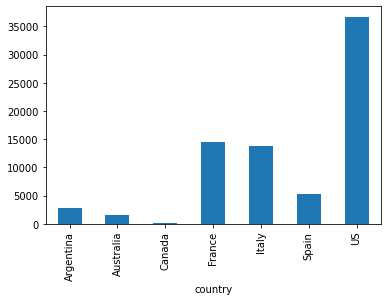

In [31]:
dataset.groupby('country').winery.count().plot.bar()
plt.show()

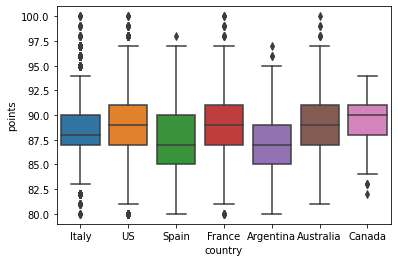

In [32]:
sns.boxplot(x='country', y='points', data=dataset)
plt.show()

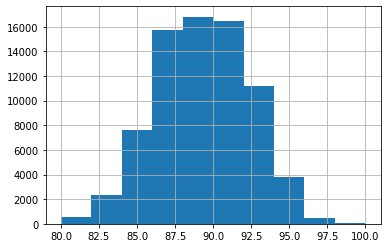

In [33]:
dataset['points'].hist()
plt.show()

In [35]:
# Text Analysis begins :
text_data = text_data
text_data.isna().sum()  # handling missing values for taster
# testing whether we can get any data by overlapping and comparing the twitter handler and taster name
taster = []
taster_id = []
ind1 = text_data[text_data['taster_name'].isna() == True].index
ind2 = text_data[text_data['taster_twitter_handle'].isna() == True].index
common = set(ind1).intersection(set(ind2))

text_data.drop(common, axis=0, inplace=True)
# label encoding for the taster name :
lb = preprocessing.LabelEncoder()
text_data.loc[:, 'taster_name_encoded'] = lb.fit_transform(text_data[['taster_name']].values)


C:\Users\adaml\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
Y=text_data['taster_name_encoded']
X=text_data.drop('taster_name_encoded',axis=1)


Training and test split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [38]:
print("Shape of train predictors",X_train.shape)
print("Shape of test predictors",X_test.shape)

Shape of train predictors (77795, 3)
Shape of test predictors (25932, 3)


wordcloud generation:

This blends fruit from DeVoto in the Sebastopol Hills with grapes from Terra de Promissio, Umino and Alder Springs vineyards. It's soft and thick, with rich, ripe flavors of cranberry, pomegranate and cherry, a sizzling sense of cola spice underlying it all.


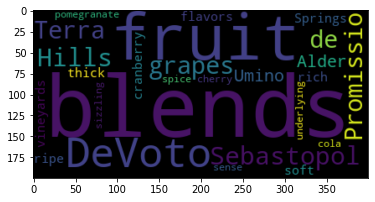

A little lean and fiery from nose to tail, but amid all the heavyweights coming from Chile that might be a good thing. The palate is tight, acidic and fresh, with an Old World mouthfeel and flavors of dried berry, earth, tobacco and spice. Snappy and crisp on the finish, with a final wave of propelling acidity. Drink now through 2014.


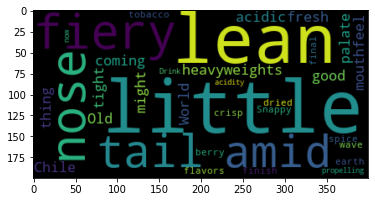

In [39]:
y=X_train.index
wordcloud1 = WordCloud().generate(X_train.loc[y[0],'description'])
wordcloud2 = WordCloud().generate(X_train.loc[y[1],'description'])
#words used by different twitters 
print(X_train.loc[y[0],'description'])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X_train.loc[y[1],'description'])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

Wordmatrix with TF-IDF

In [40]:
from sklearn import feature_extraction
cv = feature_extraction.text.CountVectorizer()
td=feature_extraction.text.TfidfVectorizer()

In [41]:
word_train_TfidfVectorizer=td.fit_transform(X_train['description'])
word_test_TfidfVectorizer=td.transform(X_test['description'])

word_train_CountVectorizer=cv.fit_transform(X_train['description'])
word_test_CountVectorizer=cv.transform(X_test['description'])

LogisticRegression with TfidfVectorizer

In [67]:
hyperparameters = [50,100,500,1000,10000]
LogisticRegression_accuracy_values = []
for i in hyperparameters:
    seconds = time.time()
    text_model_lr=LogisticRegression(max_iter=i).fit(word_train_TfidfVectorizer,Y_train)
    y_predict_lr=text_model_lr.predict(word_test_TfidfVectorizer)
    accuracy_lr=np.mean(y_predict_lr==Y_test)
    LogisticRegression_accuracy_values.append(accuracy_lr)
    print("Accuracy of Logistic Model with TfidfVectorizer ==",accuracy_lr, " max iter = ", i ,"Time: ", time.time()-seconds)

C:\Users\adaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Model with TfidfVectorizer == 0.9673376523214561  max iter =  50 Time:  16.214938640594482


C:\Users\adaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Model with TfidfVectorizer == 0.9734690729600494  max iter =  100 Time:  28.896681308746338
Accuracy of Logistic Model with TfidfVectorizer == 0.9733533857781891  max iter =  500 Time:  72.84990334510803
Accuracy of Logistic Model with TfidfVectorizer == 0.9733533857781891  max iter =  1000 Time:  71.23591732978821
Accuracy of Logistic Model with TfidfVectorizer == 0.9733533857781891  max iter =  10000 Time:  71.84641623497009


[Text(0.5, 1.0, 'hyperparameter num_iter in Logistic Model with TfidfVectorizer')]

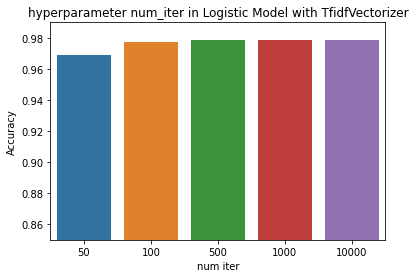

In [62]:
ax = sns.barplot(hyperparameters,LogisticRegression_accuracy_values)
ax.set(ylim=(0.85, 0.99))
ax.set(xlabel='num iter', ylabel='Accuracy')
ax.set(title = 'hyperparameter num_iter in Logistic Model with TfidfVectorizer')

LogisticRegression with CountVectorizer:

In [63]:
hyperparameters = [50,100,500,1000,10000]
LogisticRegression_accuracy_values = []
for i in hyperparameters:
    seconds = time.time()
    text_model_lr=LogisticRegression(max_iter=i).fit(word_train_CountVectorizer,Y_train)
    y_predict_lr=text_model_lr.predict(word_test_CountVectorizer)
    accuracy_lr=np.mean(y_predict_lr==Y_test)
    LogisticRegression_accuracy_values.append(accuracy_lr)
    print("Accuracy of Logistic Model with CountVectorizer ==",accuracy_lr, " max iter = ", i, " Time: ", time.time()-seconds)

C:\Users\adaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Model with CountVectorizer == 0.9691115224433133  max iter =  50  Time:  12.389330387115479


C:\Users\adaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Model with CountVectorizer == 0.9775566867191116  max iter =  100  Time:  24.150746822357178


C:\Users\adaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Model with CountVectorizer == 0.978520746567947  max iter =  500  Time:  116.63825869560242
Accuracy of Logistic Model with CountVectorizer == 0.978520746567947  max iter =  1000  Time:  175.944167137146
Accuracy of Logistic Model with CountVectorizer == 0.978520746567947  max iter =  10000  Time:  193.28845310211182


[Text(0.5, 1.0, 'hyperparameter num_iter in Logistic Model with TfidfVectorizer')]

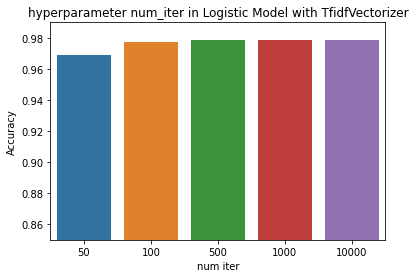

In [64]:
ax = sns.barplot(hyperparameters,LogisticRegression_accuracy_values)
ax.set(ylim=(0.85, 0.99))
ax.set(xlabel='num iter', ylabel='Accuracy')
ax.set(title = 'hyperparameter num_iter in Logistic Model with TfidfVectorizer')

Naive bayes with TfidfVectorizer:

In [65]:
seconds = time.time()
text_model_nb = MultinomialNB().fit(word_train_TfidfVectorizer,Y_train)
y_predict_nb=text_model_nb.predict(word_test_TfidfVectorizer)
accuracy_nb=np.mean(y_predict_nb==Y_test)
print("Accuracy of Naives Model with TfidfVectorizer  ==",accuracy_nb, "Time: ",time.time()-seconds )

Accuracy of Naives Model with TfidfVectorizer  == 0.8681166126793152 Time:  0.13631486892700195


Naive bayes with CountVectorizer

In [66]:
seconds = time.time()
text_model_nb = MultinomialNB().fit(word_train_CountVectorizer,Y_train)
y_predict_nb=text_model_nb.predict(word_test_CountVectorizer)
accuracy_nb=np.mean(y_predict_nb==Y_test)
print("Accuracy of Naives Model with CountVectorizer  ==",accuracy_nb, "Time: ",time.time()-seconds )

Accuracy of Naives Model with CountVectorizer  == 0.9608591701372822 Time:  0.1306605339050293
